In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv('D:\Developer\mfti_ds_ms_SM\pro_ml\WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Список неявных пропусков
implicit_missing_values = ["?", "NA", "None", "", -1, -999, 9999]

# Заменяем неявные пропуски на NaN
data.replace(implicit_missing_values, np.nan, inplace=True)

# Для численных признаков заменяем NaN на 0
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(0)

In [6]:
data.drop(columns=['customerID'], inplace=True)

In [7]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# Определяем бинарные признаки
binary_features = [col for col in data.columns if data[col].nunique() == 2]

# Определяем числовые признаки
numeric_features = data.select_dtypes(include=['int', 'float']).columns.tolist()

# Определяем категориальные признаки
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Удаляем бинарные признаки из числовых (если они там есть)
numeric_features = [col for col in numeric_features if col not in binary_features]

# Выводим результаты
print(f"Бинарные признаки: {len(binary_features)}")
print(f"Числовые признаки: {len(numeric_features)}")
print(f"Категориальные признаки: {len(categorical_features)}")

# Если нужно, выведите сами признаки
print("Бинарные признаки:", binary_features)
print("Числовые признаки:", numeric_features)
print("Категориальные признаки:", categorical_features)

Бинарные признаки: 7
Числовые признаки: 2
Категориальные признаки: 17
Бинарные признаки: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
Числовые признаки: ['tenure', 'MonthlyCharges']
Категориальные признаки: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = data.drop(columns=['Churn'])

y = data['Churn']   

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=1, 
    stratify=y)

In [11]:
# Определяем бинарные признаки
binary_features = [col for col in data.columns if data[col].nunique() == 2]

# Определяем числовые признаки
numeric_features = data.select_dtypes(include=['int', 'float']).columns.tolist()

# Определяем категориальные признаки
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Удаляем бинарные признаки из числовых (если они там есть)
numeric_features = [col for col in numeric_features if col not in binary_features]

# Выводим результаты
print(f"Бинарные признаки: {len(binary_features)}")
print(f"Числовые признаки: {len(numeric_features)}")
print(f"Категориальные признаки: {len(categorical_features)}")

Бинарные признаки: 7
Числовые признаки: 2
Категориальные признаки: 17


In [12]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
# Identify binary features
binary_features = [col for col in data.columns if data[col].nunique() == 2]

# Convert binary features to category (if not already)
for col in binary_features:
    data[col] = data[col].astype('category')

# Print binary features
print("Binary Features:", binary_features)

Binary Features: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


In [15]:
# List of categorical columns
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Convert to category
for col in categorical_columns:
    data[col] = data[col].astype('category')

In [16]:
# Identify numerical features
numeric_features = data.select_dtypes(include=['int', 'float']).columns.tolist()

# Print numerical features
print("Numerical Features:", numeric_features)

Numerical Features: ['tenure', 'MonthlyCharges']


In [17]:
print(data.dtypes)

gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges          object
Churn               category
dtype: object


In [18]:
# Check for non-numeric values
non_numeric = data[data['TotalCharges'].str.strip().str.isnumeric() == False]['TotalCharges']
print(non_numeric.unique())

['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [19]:
# Replace empty strings or spaces with NaN
data['TotalCharges'] = data['TotalCharges'].replace('', np.nan)
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)

In [20]:
# Convert to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [21]:
print(data['TotalCharges'].isnull().sum())

11


In [22]:
median_value = data['TotalCharges'].median()
data['TotalCharges'].fillna(median_value, inplace=True)

C:\Users\valso\AppData\Local\Temp\ipykernel_13488\327473422.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(median_value, inplace=True)


In [23]:
print(data['TotalCharges'].dtype)
print(data.head())

float64
   gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female             0     Yes         No       1           No   
1    Male             0      No         No      34          Yes   
2    Male             0      No         No       2          Yes   
3    Male             0      No         No      45           No   
4  Female             0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No

In [24]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [25]:
# Пример: Списки признаков
binary_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
categorical_features = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                        'Contract', 'PaymentMethod']

In [26]:
X = data.drop(columns=['Churn'])

y = data['Churn']   

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=1, 
    stratify=y)

In [27]:
# Создаем экземпляр OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Преобразуем бинарные признаки в обучающей и тестовой выборках
X_train[binary_features] = ordinal_encoder.fit_transform(X_train[binary_features])
X_test[binary_features] = ordinal_encoder.transform(X_test[binary_features])

In [28]:
# Создаем экземпляр OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False, drop=None)

# Преобразуем категориальные признаки в обучающей выборке
X_train_encoded = onehot_encoder.fit_transform(X_train[categorical_features])
X_test_encoded = onehot_encoder.transform(X_test[categorical_features])

# Получаем названия новых колонок
encoded_feature_names = onehot_encoder.get_feature_names_out(categorical_features)

# Преобразуем результат обратно в DataFrame
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

In [29]:
# Удаляем категориальные колонки из обучающей и тестовой выборок
X_train.drop(columns=categorical_features, inplace=True)
X_test.drop(columns=categorical_features, inplace=True)

In [30]:
# Объединяем обучающую выборку
X_train = pd.concat([X_train, X_train_encoded], axis=1)

# Объединяем тестовую выборку
X_test = pd.concat([X_test, X_test_encoded], axis=1)

In [31]:
print("Обучающая выборка:")
print(X_train.head())

print("\nТестовая выборка:")
print(X_test.head())

Обучающая выборка:
      gender SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
2246     0.0             0      1.0         1.0       1           1.0   
6843     0.0             0      1.0         0.0       9           1.0   
159      1.0             0      0.0         0.0      10           1.0   
6259     1.0             0      1.0         1.0      60           1.0   
4291     0.0             0      1.0         1.0      64           1.0   

      PaperlessBilling  MonthlyCharges  TotalCharges  MultipleLines_No  ...  \
2246               1.0          102.45        102.45               0.0  ...   
6843               0.0           91.75        865.80               0.0  ...   
159                0.0           25.70        251.60               0.0  ...   
6259               0.0           76.95       4543.95               1.0  ...   
4291               0.0          110.30       6997.30               0.0  ...   

      StreamingMovies_No  StreamingMovies_No internet service  \
22

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 2246 to 1309
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   gender                                   5634 non-null   float64 
 1   SeniorCitizen                            5634 non-null   category
 2   Partner                                  5634 non-null   float64 
 3   Dependents                               5634 non-null   float64 
 4   tenure                                   5634 non-null   int64   
 5   PhoneService                             5634 non-null   float64 
 6   PaperlessBilling                         5634 non-null   float64 
 7   MonthlyCharges                           5634 non-null   float64 
 8   TotalCharges                             5634 non-null   float64 
 9   MultipleLines_No                         5634 non-null   float64 
 10  MultipleLines_No phone service        

In [33]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1409 entries, 6826 to 936
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   gender                                   1409 non-null   float64 
 1   SeniorCitizen                            1409 non-null   category
 2   Partner                                  1409 non-null   float64 
 3   Dependents                               1409 non-null   float64 
 4   tenure                                   1409 non-null   int64   
 5   PhoneService                             1409 non-null   float64 
 6   PaperlessBilling                         1409 non-null   float64 
 7   MonthlyCharges                           1409 non-null   float64 
 8   TotalCharges                             1409 non-null   float64 
 9   MultipleLines_No                         1409 non-null   float64 
 10  MultipleLines_No phone service         

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [35]:
# Создаем модель случайного леса
rf_model = RandomForestClassifier(random_state=1)

# Обучаем модель на тренировочных данных
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [36]:
# Предсказания на тренировочной выборке
y_train_pred = rf_model.predict(X_train)

# Предсказания на тестовой выборке
y_test_pred = rf_model.predict(X_test)

In [37]:
# Вычисляем F1-score на тренировочной выборке
f1_train = f1_score(y_train, y_train_pred, average='macro')

# Вычисляем F1-score на тестовой выборке
f1_test = f1_score(y_test, y_test_pred, average='macro')

# Выводим результаты
print(f"F1-score (тренировочная выборка): {f1_train}")
print(f"F1-score (тестовая выборка): {f1_test}")

F1-score (тренировочная выборка): 0.9970377057325746
F1-score (тестовая выборка): 0.7077182040097922


In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
# Создаем модель градиентного бустинга
gb_model = GradientBoostingClassifier(random_state=1)

# Обучаем модель на тренировочных данных
gb_model.fit(X_train, y_train)

# Предсказания на тренировочной выборке
y_train_pred = gb_model.predict(X_train)

# Предсказания на тестовой выборке
y_test_pred = gb_model.predict(X_test)

In [40]:
# Вычисляем F1-score на тренировочной выборке
f1_train = f1_score(y_train, y_train_pred, average='macro')

# Вычисляем F1-score на тестовой выборке
f1_test = f1_score(y_test, y_test_pred, average='macro')

# Выводим результаты
print(f"F1-score (тренировочная выборка): {f1_train}")
print(f"F1-score (тестовая выборка): {f1_test}")

F1-score (тренировочная выборка): 0.7609041355232282
F1-score (тестовая выборка): 0.7265072189106874


In [41]:


# Инициализируем списки для хранения значений метрик
train_f1_scores = []
test_f1_scores = []
depths = range(1, 21)  # Глубина деревьев от 1 до 20

for depth in depths:
    # Создаем модель градиентного бустинга с текущей глубиной
    gb_model = GradientBoostingClassifier(max_depth=depth, random_state=1)
    
    # Обучаем модель
    gb_model.fit(X_train, y_train)
    
    # Предсказания на тренировочной и тестовой выборках
    y_train_pred = gb_model.predict(X_train)
    y_test_pred = gb_model.predict(X_test)
    
    # Вычисляем F1-score на тренировочной выборке
    f1_train = f1_score(y_train, y_train_pred, average='macro')
    train_f1_scores.append(f1_train)
    
    # Вычисляем F1-score на тестовой выборке
    f1_test = f1_score(y_test, y_test_pred, average='macro')
    test_f1_scores.append(f1_test)

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

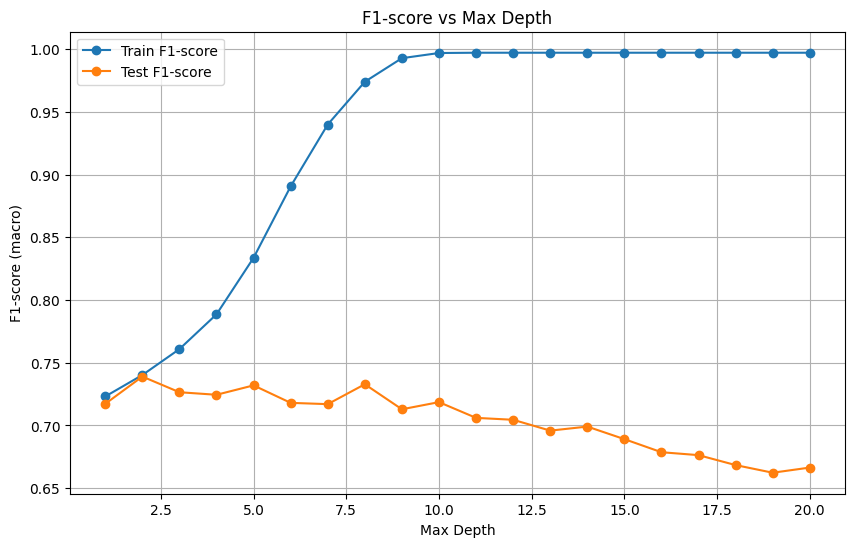

In [43]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(depths, train_f1_scores, label="Train F1-score", marker='o')
plt.plot(depths, test_f1_scores, label="Test F1-score", marker='o')

# Добавление подписей и легенды
plt.title("F1-score vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("F1-score (macro)")
plt.legend()
plt.grid()

# Отображение графика
plt.show()

In [44]:
# Инициализируем списки для хранения значений метрик
train_f1_scores = []
test_f1_scores = []
learning_rates = np.arange(0.1, 1.0, 0.1)  # Скорость обучения от 0.1 до 0.9 с шагом 0.1

for lr in learning_rates:
    # Создаем модель градиентного бустинга с текущей скоростью обучения
    gb_model = GradientBoostingClassifier(learning_rate=lr, random_state=1)
    
    # Обучаем модель на преобразованных данных
    gb_model.fit(X_train, y_train)
    
    # Предсказания на тренировочной и тестовой выборках
    y_train_pred = gb_model.predict(X_train)
    y_test_pred = gb_model.predict(X_test)
    
    # Вычисляем F1-score на тренировочной выборке
    f1_train = f1_score(y_train, y_train_pred, average='macro')
    train_f1_scores.append(f1_train)
    
    # Вычисляем F1-score на тестовой выборке
    f1_test = f1_score(y_test, y_test_pred, average='macro')
    test_f1_scores.append(f1_test)

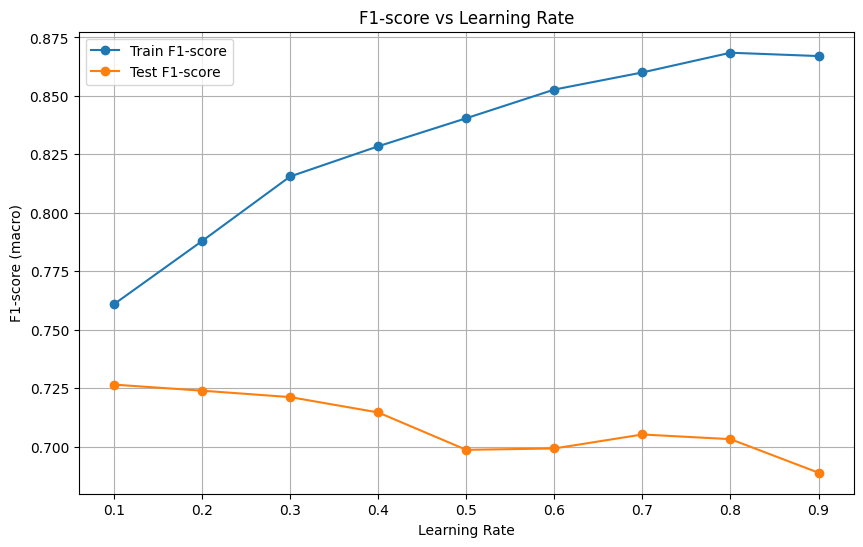

In [45]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, train_f1_scores, label="Train F1-score", marker='o')
plt.plot(learning_rates, test_f1_scores, label="Test F1-score", marker='o')

# Добавление подписей и легенды
plt.title("F1-score vs Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("F1-score (macro)")
plt.legend()
plt.grid()

# Отображение графика
plt.show()

In [46]:
# Удаляем идентификатор клиента, если он есть
if 'customerID' in data.columns:
    data = data.drop(columns=['customerID'])

In [47]:
# Разделяем данные на признаки и целевой признак
X = data.drop(columns=['Churn'])
y = data['Churn']

In [48]:
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,         # 20% данных для тестовой выборки
    stratify=y,            # Стратификация по целевому признаку
    random_state=1         # Фиксация случайного разбиения
)

In [49]:
# Определяем категориальные и бинарные признаки
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
binary_features = [col for col in X.columns if X[col].nunique() == 2]

# Объединяем списки категориальных и бинарных признаков
cat_features = categorical_features + binary_features

In [51]:
from catboost import CatBoostClassifier
# Создаем модель CatBoost
catboost_model = CatBoostClassifier(
    random_state=1,
    n_estimators=100,
    cat_features=cat_features,
    verbose=0  # Отключаем вывод логов обучения
)

# Обучаем модель
catboost_model.fit(X_train, y_train)

ModuleNotFoundError: No module named 'catboost'